In [1]:
%matplotlib inline
from os.path import join, dirname, abspath
import arviz as az
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

HERE = dirname(abspath(__name__))
IMG_DIR = join(dirname(HERE), 'img')
plt.style.use('seaborn-poster')
figsize=(16, 8)

In [2]:
np.random.seed(0)
x = np.random.rand(200)
y = np.random.rand(*x.shape)
data = {
    'x': x,
    'y': y,
    'z': x - y,
}

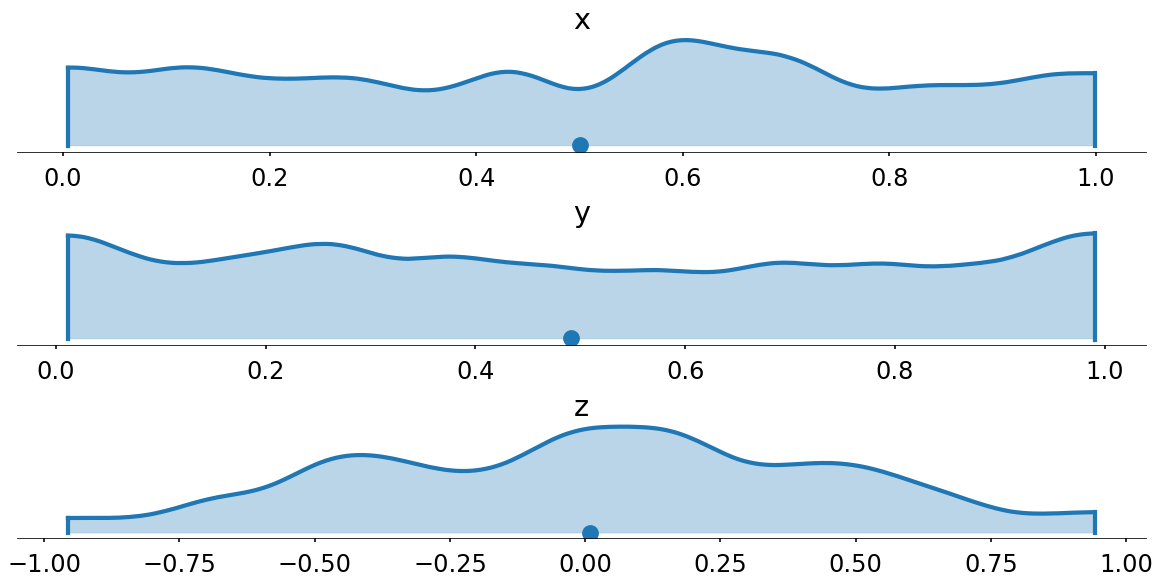

In [3]:
_, axes = plt.subplots(nrows=3, figsize=figsize, constrained_layout=True)
az.plot_density(data, credible_interval=0.999, figsize=figsize, shade=0.3, textsize=24, ax=axes);
plt.savefig(join(IMG_DIR, 'density1.png'), transparent=True)

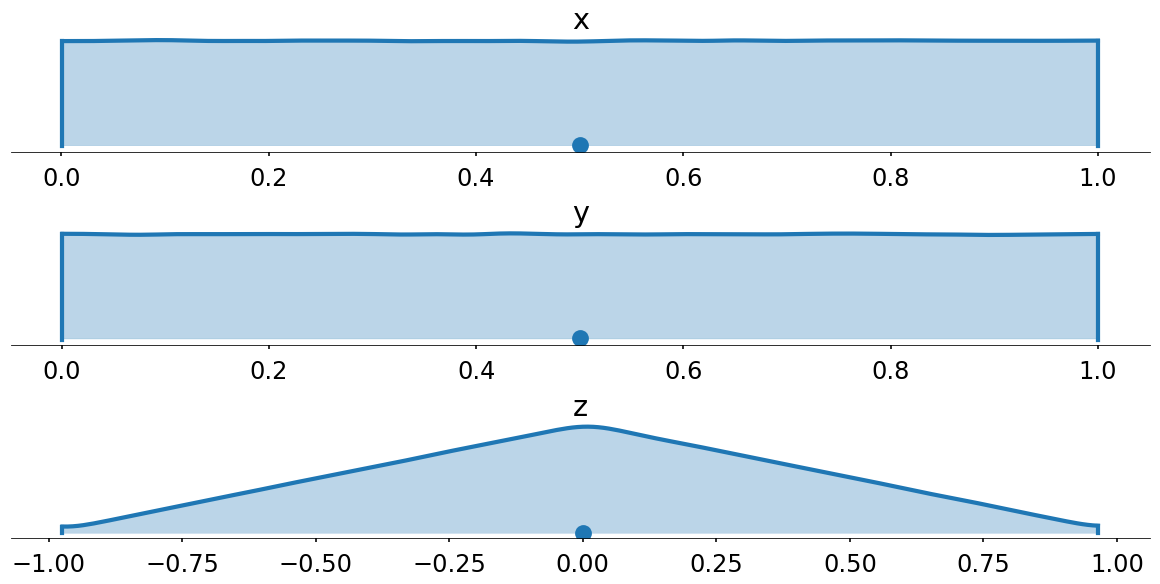

In [4]:
x2 = np.random.rand(2_000_000)
y2 = np.random.rand(*x2.shape)
data2 = {
    'x': x2,
    'y': y2,
    'z': x2 - y2,
}
_, axes = plt.subplots(nrows=3, figsize=figsize, constrained_layout=True)

az.plot_density(data2, credible_interval=0.999, figsize=figsize, shade=0.3, textsize=24, ax=axes);
plt.savefig(join(IMG_DIR, 'density2.png'), transparent=True)

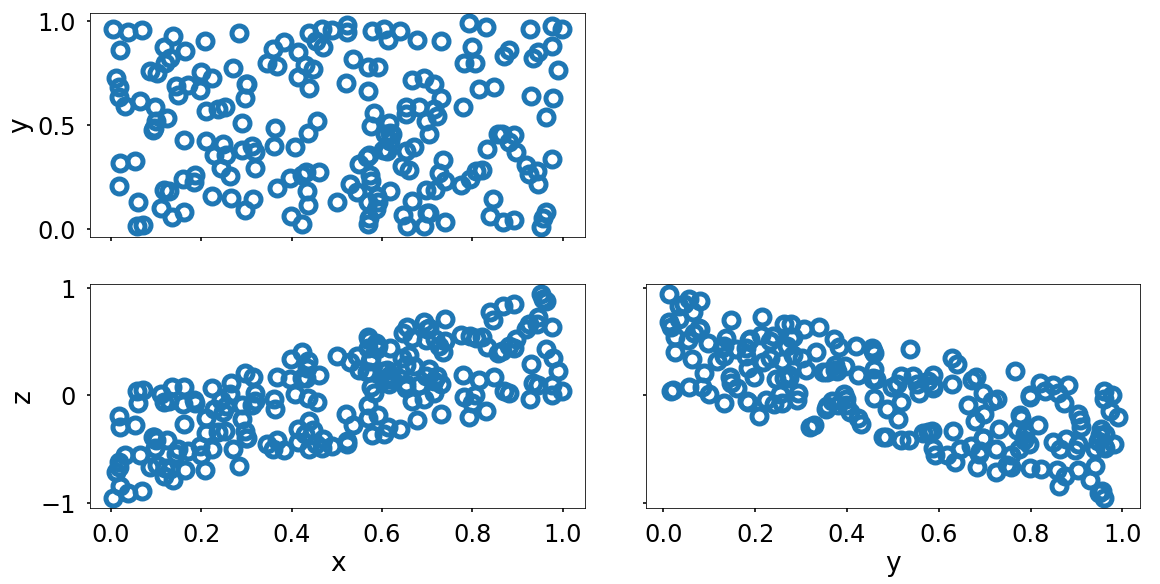

In [5]:
az.plot_pair(data, plot_kwargs={'mfc': 'none', 'markeredgewidth': 5, 'markeredgecolor': 'C0', 'markersize': 30}, textsize=24, figsize=figsize);
plt.savefig(join(IMG_DIR, 'pair1.png'), transparent=True)

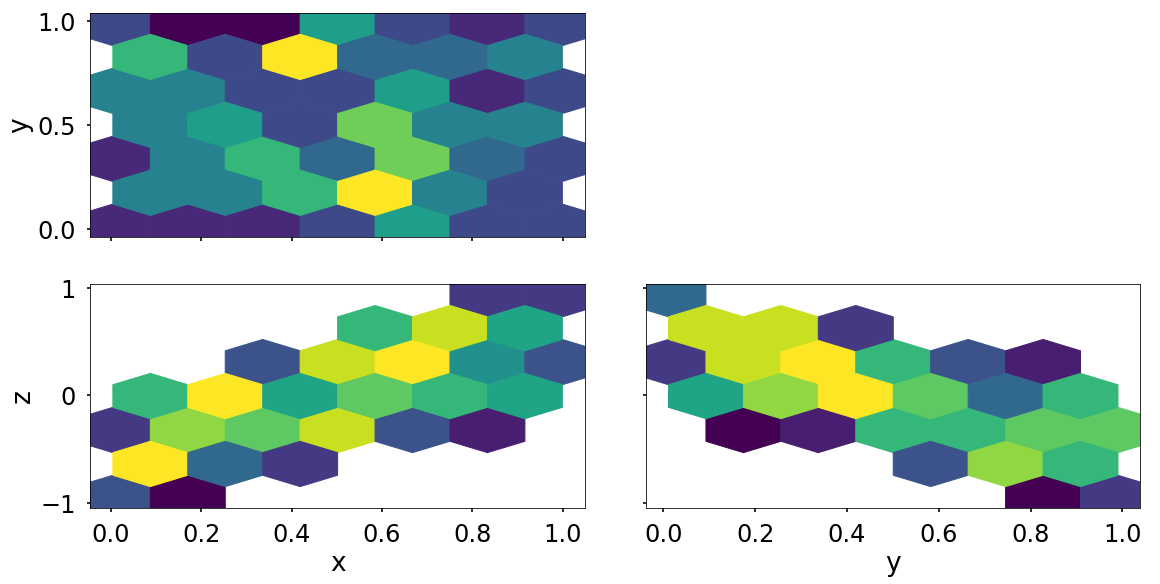

In [6]:
az.plot_pair(data, kind='hexbin', textsize=24, figsize=figsize);
plt.savefig(join(IMG_DIR, 'pair2.png'), transparent=True)

/home/colin/projects/arviz/arviz/plots/kdeplot.py:301: RuntimeWarning: invalid value encountered in sqrt
  std_devs = np.diag(cov ** 0.5)


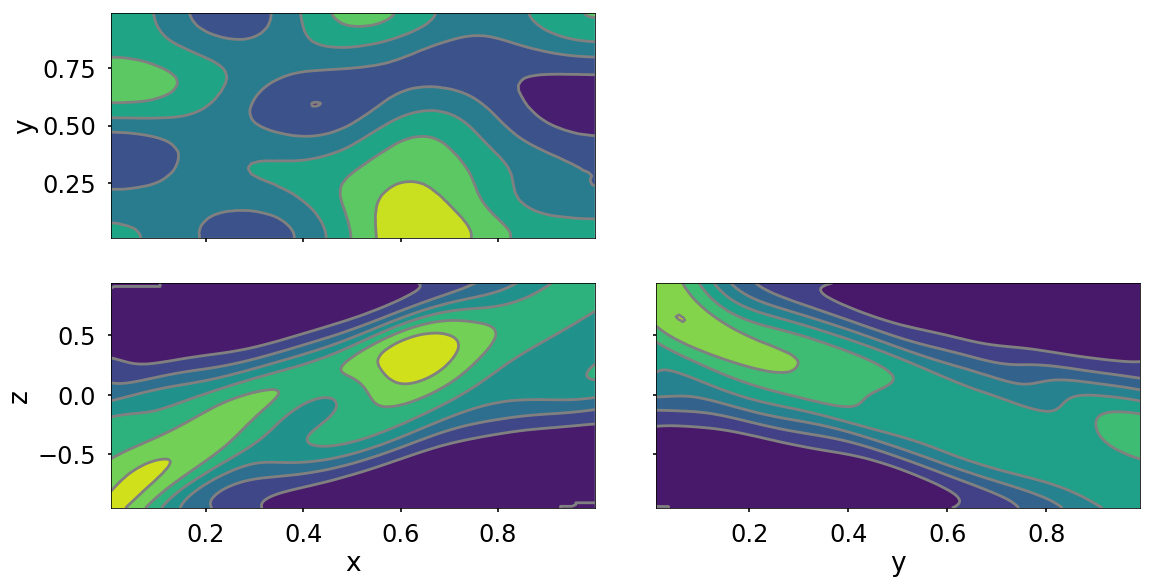

In [7]:
az.plot_pair(data, kind='kde', textsize=24, figsize=figsize);
plt.savefig(join(IMG_DIR, 'pair3.png'), transparent=True)

/home/colin/miniconda3/envs/arviz3.6/lib/python3.6/site-packages/matplotlib/_constrained_layout.py:158: UserWarning: There are no gridspecs with layoutboxes. Possibly did not call parent GridSpec with the figure= keyword
  warnings.warn('There are no gridspecs with layoutboxes. '


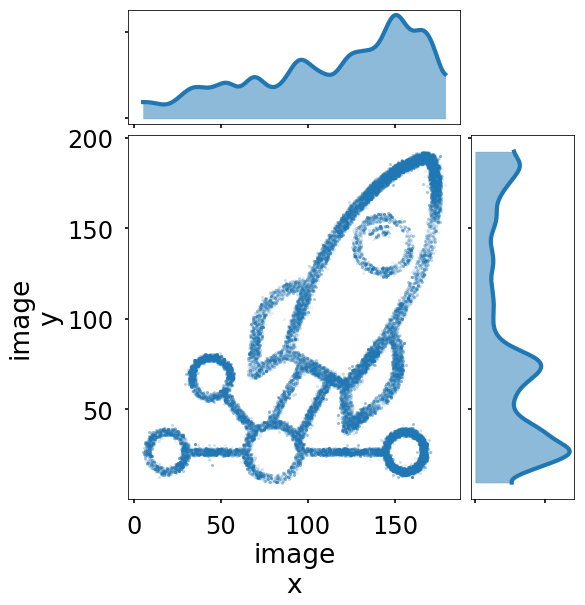

In [8]:
pymc3 = az.load_data(join(HERE, 'pymc3.nc'))
az.plot_joint(pymc3, 
              coords={'axis': ['x', 'y']}, 
              joint_kwargs={'marker': '.', 's': 20, 'alpha': 0.1}, 
              marginal_kwargs={'fill_kwargs': {'alpha': 0.5}},
              textsize=24, 
              figsize=(8, 9));
plt.savefig(join(IMG_DIR, 'joint1.png'), transparent=True, bbox_inches='tight')

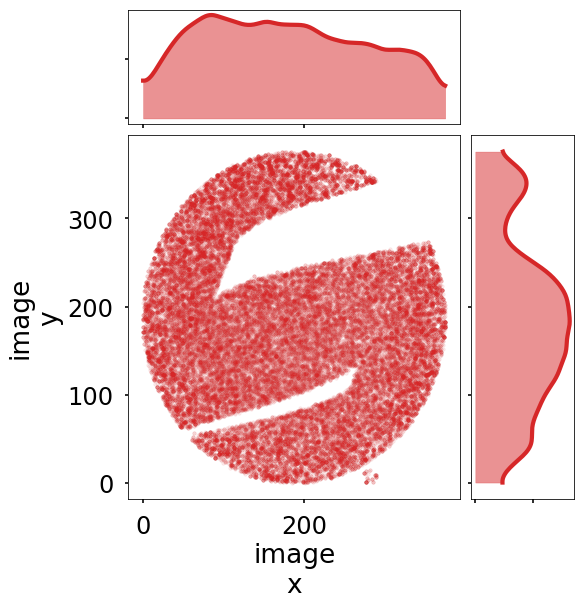

In [9]:
stan = az.load_data(join(HERE, 'stan.nc'))
az.plot_joint(stan,
              coords={'axis': ['x', 'y']}, 
              joint_kwargs={'marker': '.', 's': 50, 'alpha': 0.1, 'color': 'C3'}, 
              marginal_kwargs={'plot_kwargs': {'color': 'C3'}, 'fill_kwargs': {'alpha': 0.5}},
              textsize=24, 
              figsize=(8, 9));
plt.savefig(join(IMG_DIR, 'joint2.png'), transparent=True, bbox_inches='tight')

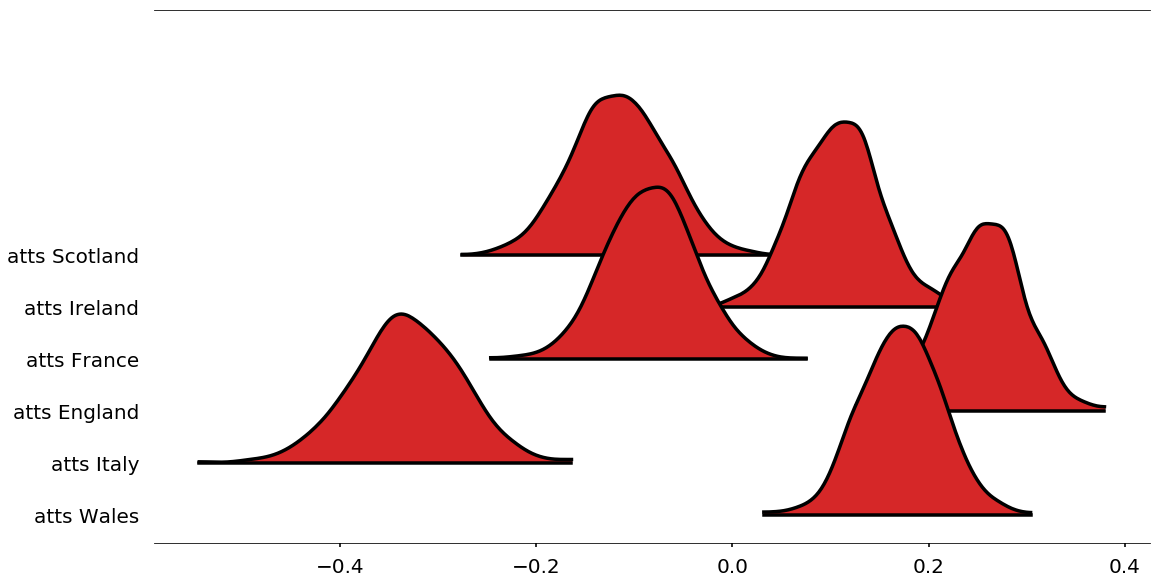

In [10]:
rugby = az.load_data(join(HERE, 'rugby.nc'))
fig, axes = az.plot_forest(rugby,
                           kind='ridgeplot',
                           var_names=['atts'],
                           combined=True,
                           textsize=20,
                           ridgeplot_overlap=3,
                           colors='C3',
                        figsize=figsize)
plt.savefig(join(IMG_DIR, 'ridge1.png'), transparent=True)

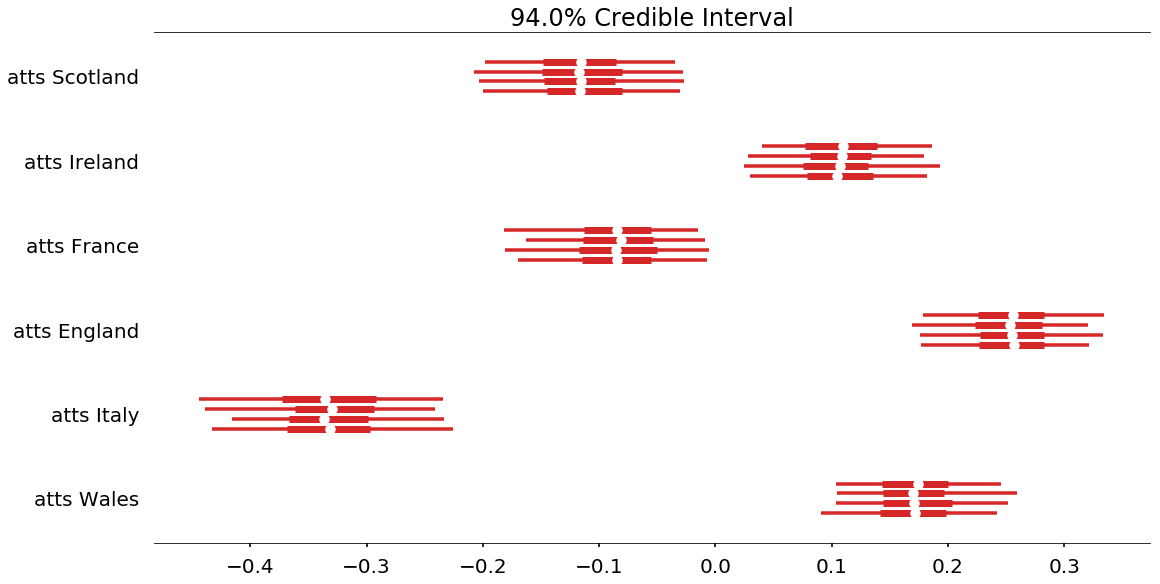

In [11]:
fig, axes = az.plot_forest(rugby,
                           kind='forestplot',
                           var_names=['atts'],
                           textsize=20,
                           ridgeplot_overlap=3,
                           colors='C3',
                        figsize=figsize)
plt.savefig(join(IMG_DIR, 'ridge2.png'), transparent=True)

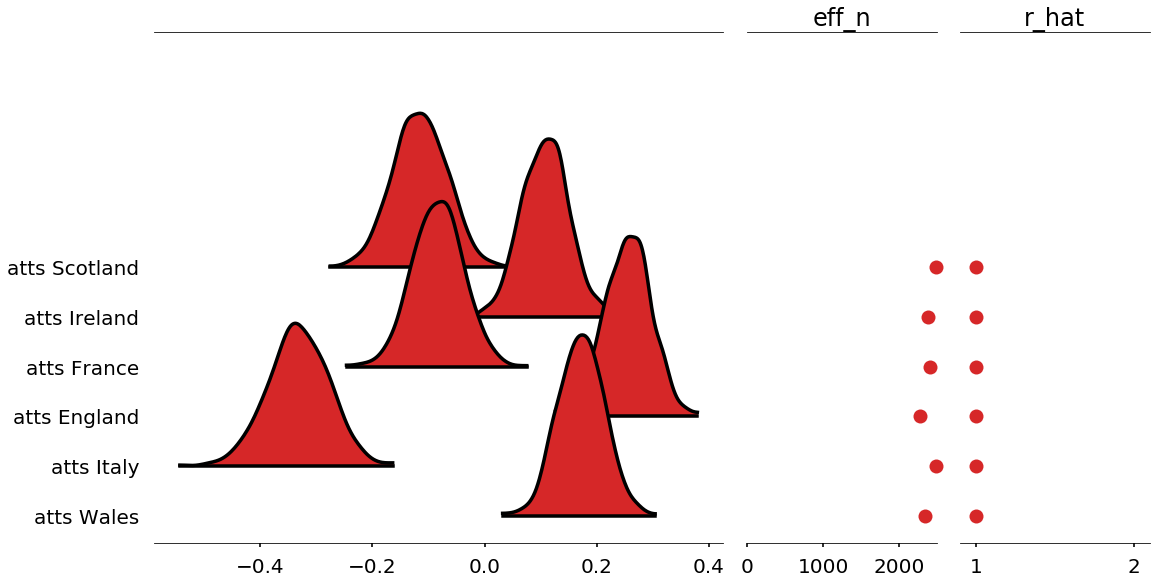

In [12]:
fig, axes = az.plot_forest(rugby,
                           kind='ridgeplot',
                           var_names=['atts'],
                           combined=True,
                           textsize=20,
                           ridgeplot_overlap=3,
                           colors='C3',
                           eff_n=True,
                           r_hat=True,
                           figsize=figsize)
plt.savefig(join(IMG_DIR, 'ridge3.png'), transparent=True)

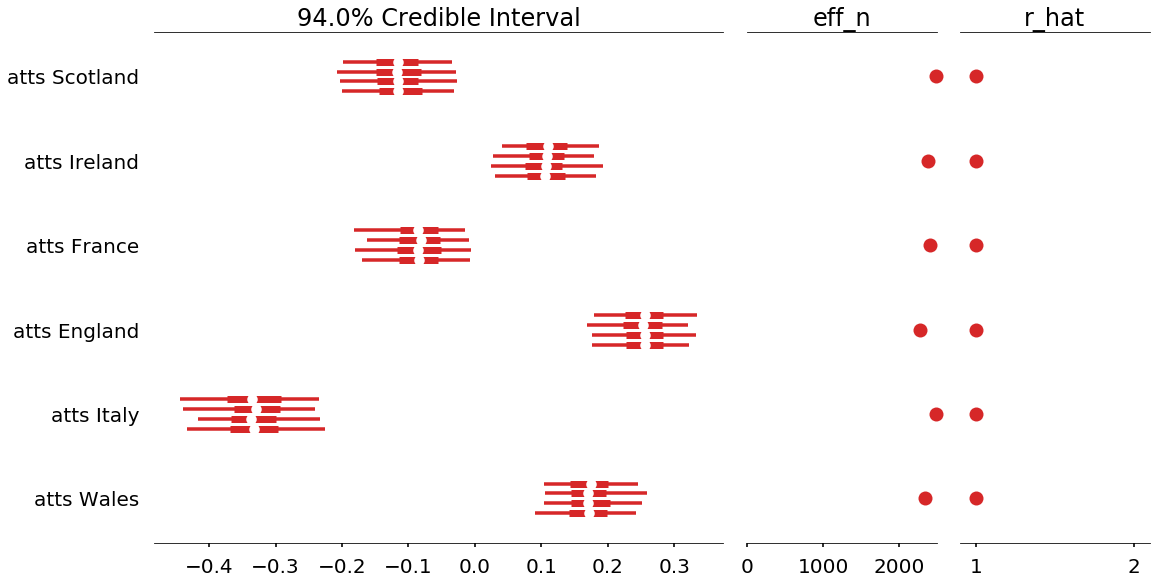

In [13]:
fig, axes = az.plot_forest(rugby,
                           kind='forestplot',
                           var_names=['atts'],
                           textsize=20,
                           ridgeplot_overlap=3,
                           colors='C3',
                           eff_n=True,
                           r_hat=True,
                           figsize=figsize)
plt.savefig(join(IMG_DIR, 'ridge4.png'), transparent=True)

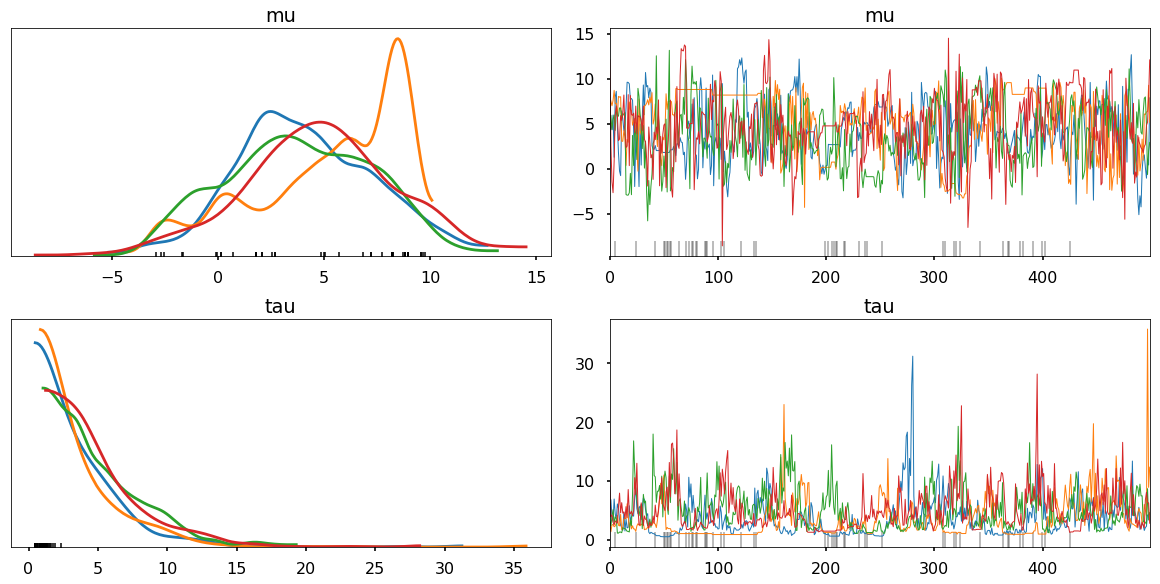

In [14]:
centered = az.load_arviz_data('centered_eight')
az.plot_trace(centered, var_names=['mu', 'tau'], trace_kwargs={'alpha': 1, 'linewidth': 1}, figsize=figsize);
plt.savefig(join(IMG_DIR, 'trace1.png'), transparent=True)

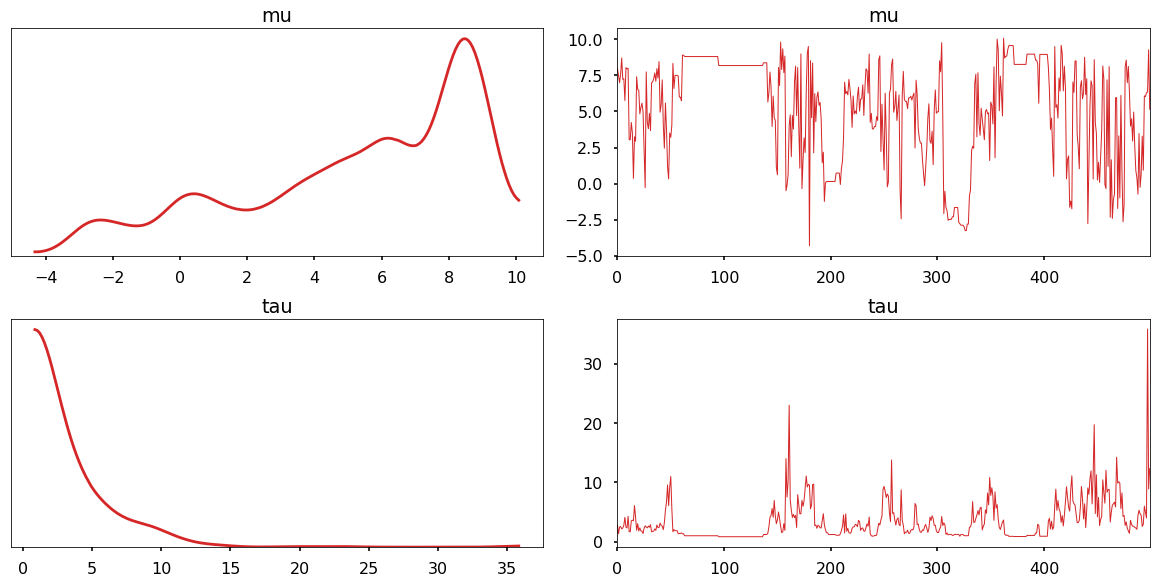

In [15]:
az.plot_trace(centered.posterior.sel(chain=1), var_names=['mu', 'tau'], trace_kwargs={'color': 'C3', 'alpha': 1, 'linewidth': 1}, figsize=figsize);
plt.savefig(join(IMG_DIR, 'trace2.png'), transparent=True)

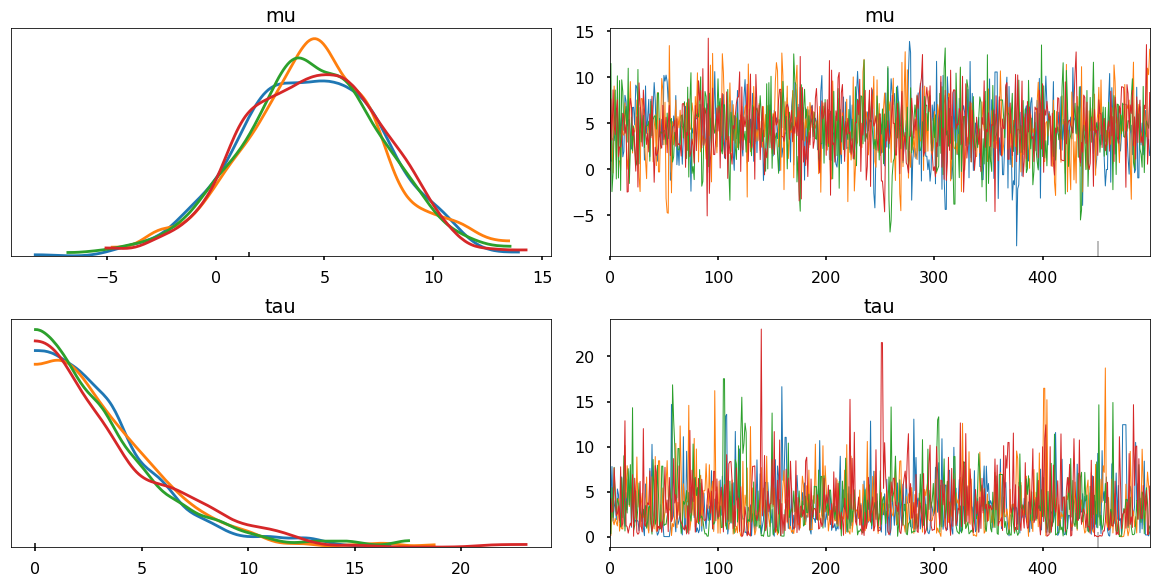

In [16]:
non_centered = az.load_arviz_data('non_centered_eight')

az.plot_trace(non_centered, var_names=['mu', 'tau'], trace_kwargs={'alpha': 1, 'linewidth': 1}, figsize=figsize);
plt.savefig(join(IMG_DIR, 'trace3.png'), transparent=True)

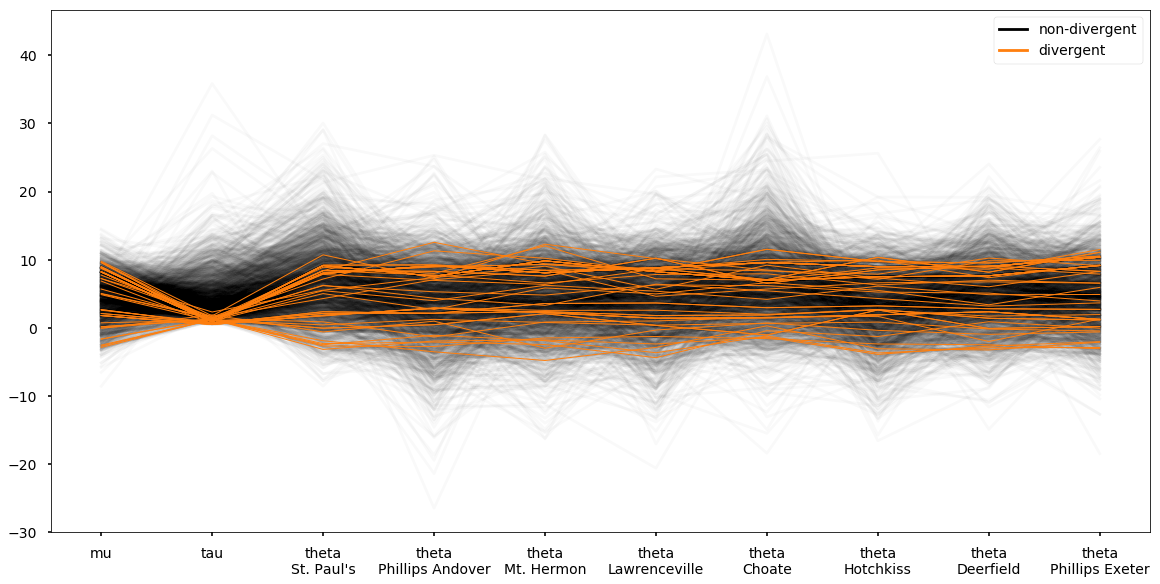

In [17]:
az.plot_parallel(centered, var_names=['mu', 'tau', 'theta'], figsize=figsize, textsize=14);
plt.savefig(join(IMG_DIR, 'parallel1.png'), transparent=True)

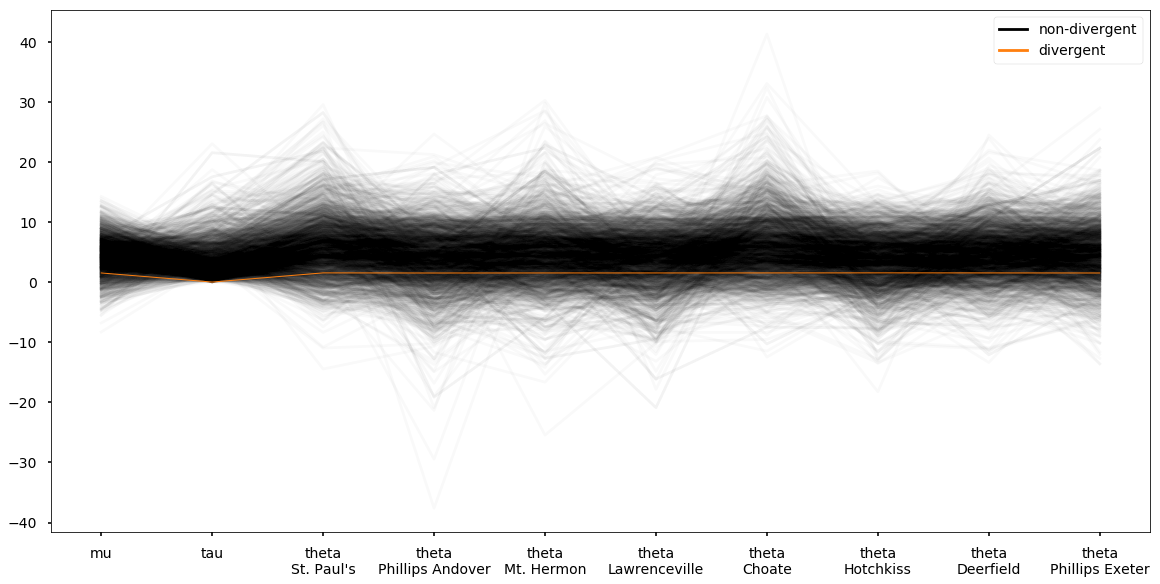

In [18]:
az.plot_parallel(non_centered, var_names=['mu', 'tau', 'theta'], figsize=figsize, textsize=14);
plt.savefig(join(IMG_DIR, 'parallel2.png'), transparent=True)

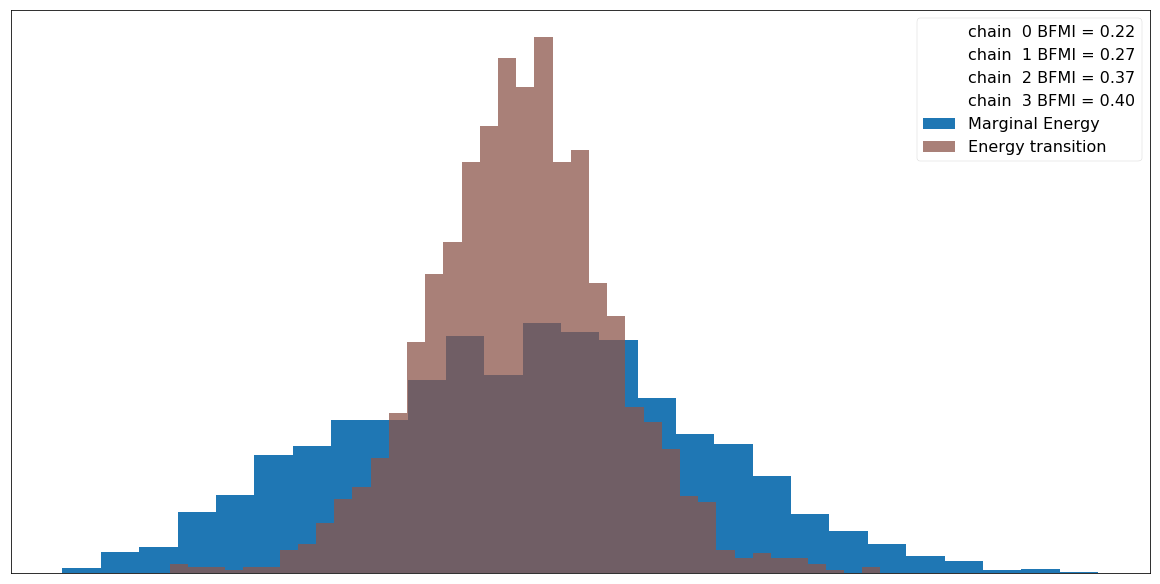

In [19]:
az.plot_energy(centered, kind='hist', figsize=figsize, textsize=14);
plt.savefig(join(IMG_DIR, 'energy1.png'), transparent=True)

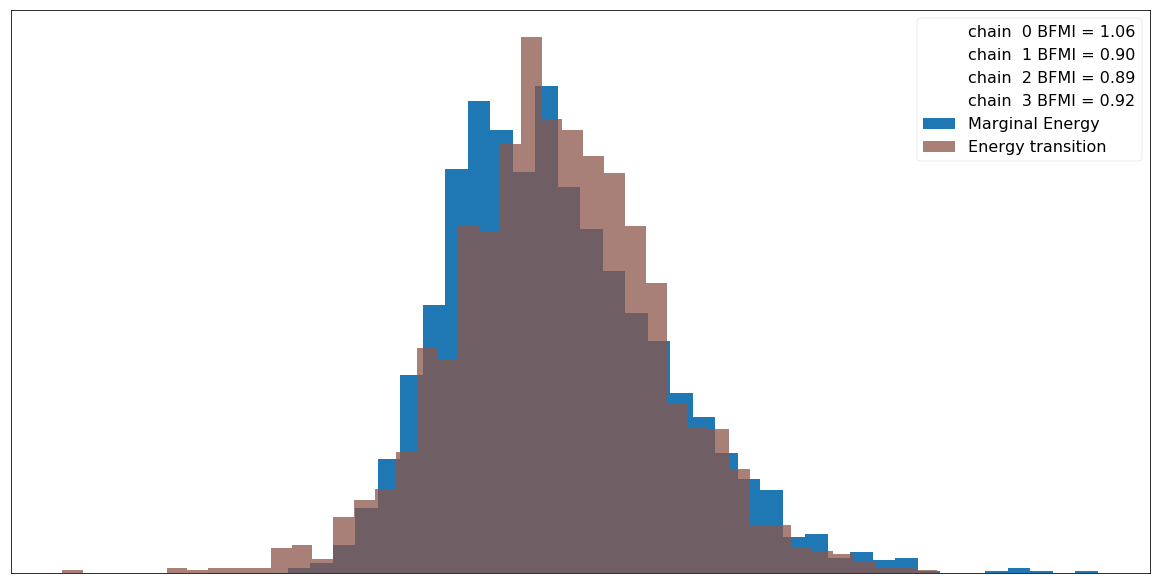

In [20]:
az.plot_energy(non_centered, kind='hist', figsize=figsize, textsize=32);
plt.savefig(join(IMG_DIR, 'energy2.png'), transparent=True)

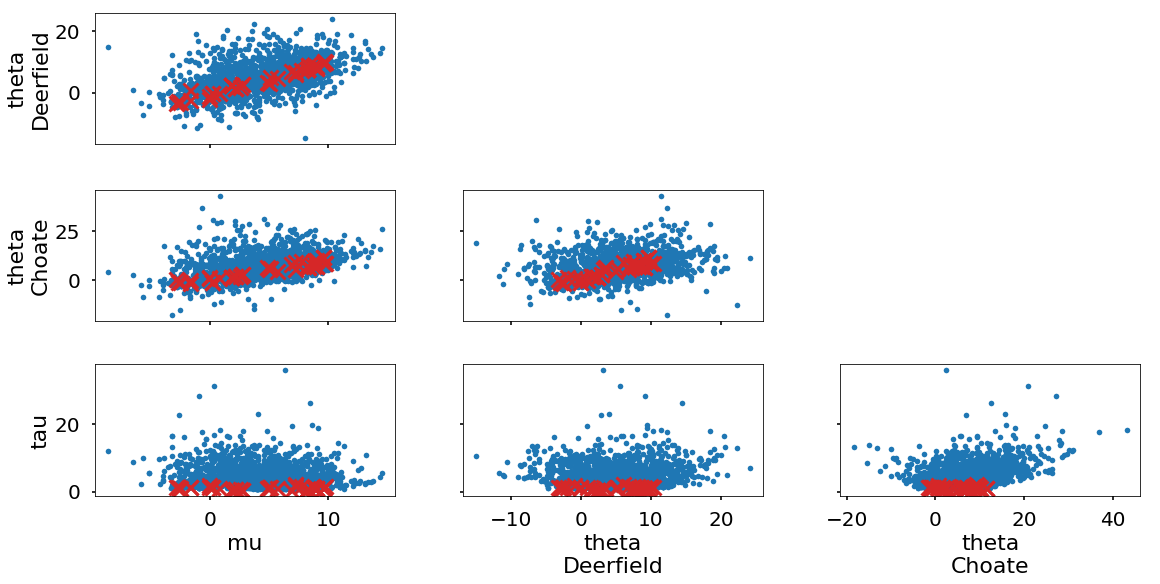

In [30]:
az.plot_pair(centered, divergences_kwargs={'marker': 'x', 'markersize': 15, 'mew': 3, 'markeredgecolor': 'C3'},
             var_names=['mu', 'theta', 'tau'], 
             coords={'school': ['Deerfield', 'Choate']}, 
             divergences=True, 
             figsize=figsize,
             textsize=20);
plt.savefig(join(IMG_DIR, 'pairdiv1.png'), transparent=True)

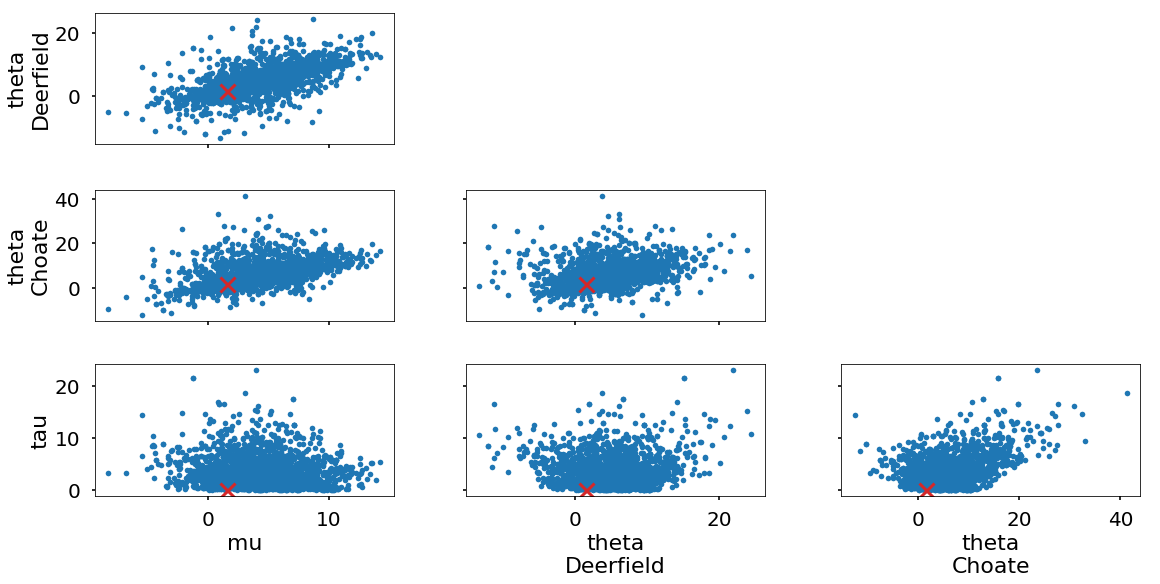

In [31]:
az.plot_pair(non_centered, divergences_kwargs={'marker': 'x', 'markersize': 15, 'mew': 3, 'markeredgecolor': 'C3'},
             var_names=['mu', 'theta', 'tau'], 
             coords={'school': ['Deerfield', 'Choate']}, 
             divergences=True, 
             figsize=figsize,
             textsize=20);
plt.savefig(join(IMG_DIR, 'pairdiv2.png'), transparent=True)

In [32]:
print(az.summary(centered, var_names=['mu', 'tau']).to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>mean</th>
      <th>sd</th>
      <th>mc error</th>
      <th>hpd 3%</th>
      <th>hpd 97%</th>
      <th>eff_n</th>
      <th>r_hat</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>mu</th>
      <td>4.44</td>
      <td>3.49</td>
      <td>0.21</td>
      <td>-2.68</td>
      <td>9.79</td>
      <td>192.0</td>
      <td>1.02</td>
    </tr>
    <tr>
      <th>tau</th>
      <td>4.27</td>
      <td>3.42</td>
      <td>0.35</td>
      <td>0.48</td>
      <td>10.26</td>
      <td>130.0</td>
      <td>1.03</td>
    </tr>
  </tbody>
</table>


In [33]:
print(az.summary(non_centered, var_names=['mu', 'tau']).to_html())

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>mean</th>
      <th>sd</th>
      <th>mc error</th>
      <th>hpd 3%</th>
      <th>hpd 97%</th>
      <th>eff_n</th>
      <th>r_hat</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>mu</th>
      <td>4.40</td>
      <td>3.26</td>
      <td>0.05</td>
      <td>-1.39</td>
      <td>10.83</td>
      <td>2156.0</td>
      <td>1.0</td>
    </tr>
    <tr>
      <th>tau</th>
      <td>3.52</td>
      <td>3.05</td>
      <td>0.09</td>
      <td>0.00</td>
      <td>8.89</td>
      <td>1207.0</td>
      <td>1.0</td>
    </tr>
  </tbody>
</table>


In [34]:
np.random.seed(0)

m = -1
b = 1
x = np.random.uniform(0, 1, size=20)

y = m * x + b + 0.2 * np.random.randn(*x.shape)

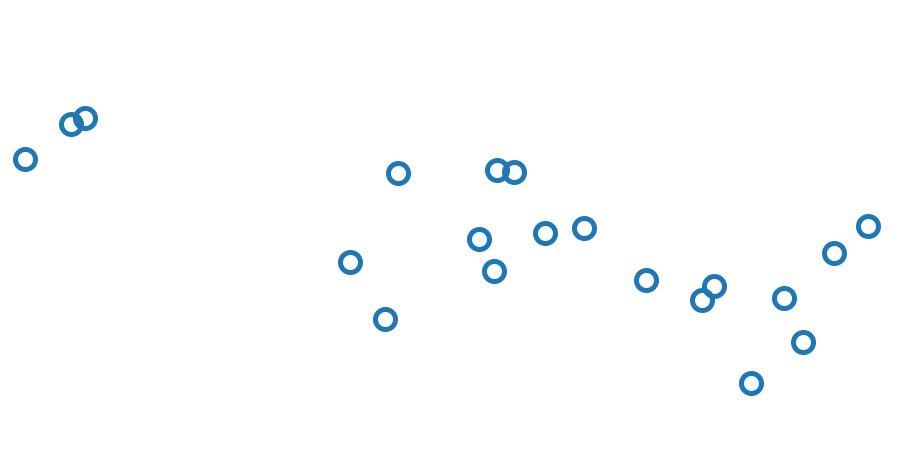

In [35]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(x, y, 'o', markerfacecolor='none', markeredgewidth=5, markersize=20)
ax.set_ylim(-0.5, 1.5)
ax.set_xlim(0, 1);
[v.set_visible(False) for v in ax.spines.values()]
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)

plt.savefig(join(IMG_DIR, 'linear1.png'), transparent=True)

In [36]:
lin_model = LinearRegression().fit(np.atleast_2d(x).T, y)

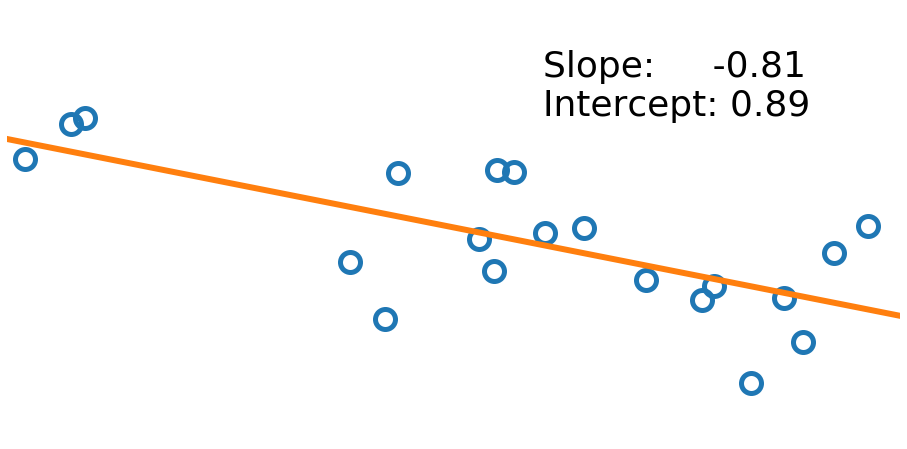

In [37]:
fig, ax = plt.subplots(figsize=figsize)
ax.plot(x, y, 'o', markerfacecolor='none', markeredgewidth=5, markersize=20)

test_x = np.linspace(0, 1)
test_y = lin_model.predict(np.atleast_2d(test_x).T)
ax.plot(test_x, test_y, linewidth=6)
ax.text(0.6, 1, f'Slope:     {lin_model.coef_[0]:.2f}\nIntercept: {lin_model.intercept_:.2f}', fontsize=36)
ax.set_ylim(-0.5, 1.5)
ax.set_xlim(0, 1)
[v.set_visible(False) for v in ax.spines.values()]
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)

plt.savefig(join(IMG_DIR, 'linear2.png'), transparent=True)

In [38]:
import pymc3 as pm

with pm.Model() as model:
    slope = pm.Normal('slope')
    intercept = pm.Normal('intercept')
    y_observed = pm.Normal('y', mu=slope * x + intercept, sd=0.2, shape=y.shape)

graph = pm.model_to_graphviz(model)
graph.format = 'png'
plt.savefig(join(IMG_DIR, 'graph1.png'), transparent=True)    
    
with pm.Model() as model:
    slope = pm.Normal('slope')
    intercept = pm.Normal('intercept')
    y_observed = pm.Normal('y', mu=slope * x + intercept, sd=0.2, observed=y)
    trace = pm.sample(1000)
    posterior_predictive = pm.sample_posterior_predictive(trace, samples=500)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, slope]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2157.28draws/s]
The acceptance probability does not match the target. It is 0.6867388411843167, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8786072367224478, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8817336868681396, but should be close to 0.8. Try to increase the number of tuning steps.
100%|██████████| 500/500 [00:00<00:00, 553.95it/s]


<Figure size 432x288 with 0 Axes>

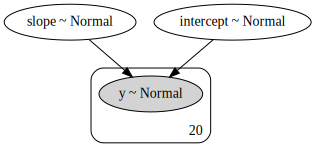

<Figure size 432x288 with 0 Axes>

In [39]:
graph = pm.model_to_graphviz(model)
graph.format = 'png'
plt.savefig(join(IMG_DIR, 'graph2.png'), transparent=True)    
graph

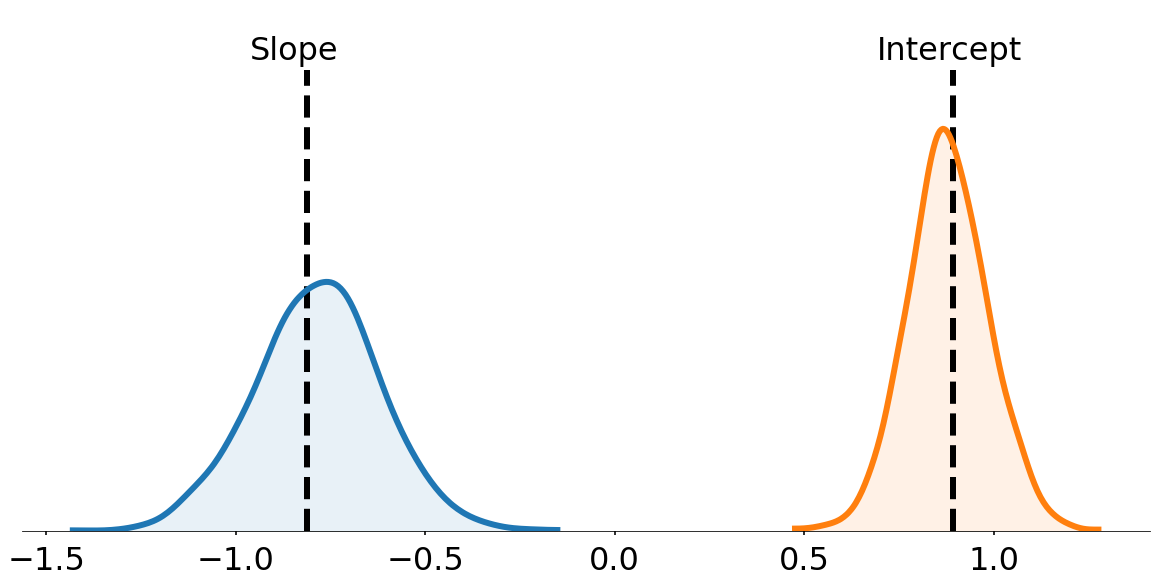

In [40]:
ylims = (0, 5)

fig, ax = plt.subplots(figsize=figsize, constrained_layout=True)

az.plot_kde(trace['slope'], ax=ax, fill_kwargs={'alpha': 0.1}, plot_kwargs={'linewidth': 6})


az.plot_kde(trace['intercept'], ax=ax, fill_kwargs={'alpha': 0.1}, plot_kwargs={'color': 'C1', 'linewidth': 6})


ax.vlines(lin_model.coef_[0], 0, 4.4, linestyles='--', linewidth=6)
ax.vlines(lin_model.intercept_, 0, 4.4, linestyles='--', linewidth=6)

ax.text(lin_model.coef_[0] - 0.15, 4.5, 'Slope', fontsize=32)
ax.text(lin_model.intercept_ - 0.2, 4.5, 'Intercept', fontsize=32)

ax.set_ylim(*ylims)
xlims = ax.get_xlim()
for edge in ('left', 'top', 'right'):
    ax.spines[edge].set_visible(False)
ax.yaxis.set_visible(False)
ax.tick_params(axis='x', which='major', labelsize=32)

plt.savefig(join(IMG_DIR, 'uncertainty2.png'), transparent=True)    


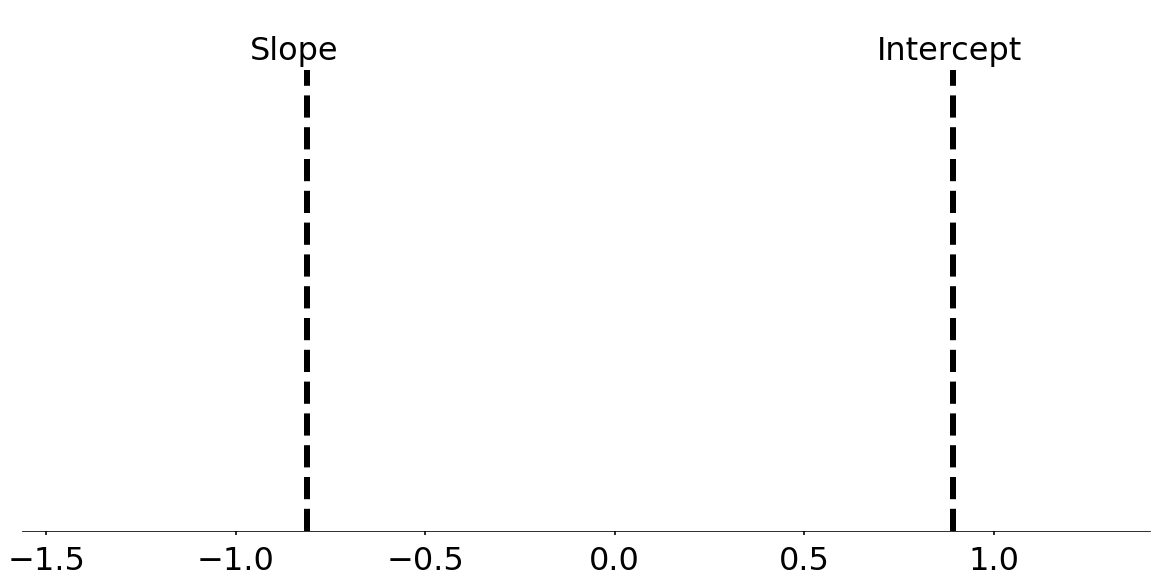

In [41]:

fig, ax = plt.subplots(figsize=figsize, constrained_layout=True)


ax.vlines(lin_model.coef_[0], 0, 4.4, linestyles='--', linewidth=6)
ax.vlines(lin_model.intercept_, 0, 4.4, linestyles='--', linewidth=6)

ax.text(lin_model.coef_[0] - 0.15, 4.5, 'Slope', fontsize=32)
ax.text(lin_model.intercept_ - 0.2, 4.5, 'Intercept', fontsize=32)

ax.set_ylim(*ylims)
ax.set_xlim(*xlims)
for edge in ('left', 'top', 'right'):
    ax.spines[edge].set_visible(False)
ax.yaxis.set_visible(False)
ax.tick_params(axis='x', which='major', labelsize=32)

plt.savefig(join(IMG_DIR, 'uncertainty1.png'), transparent=True)    


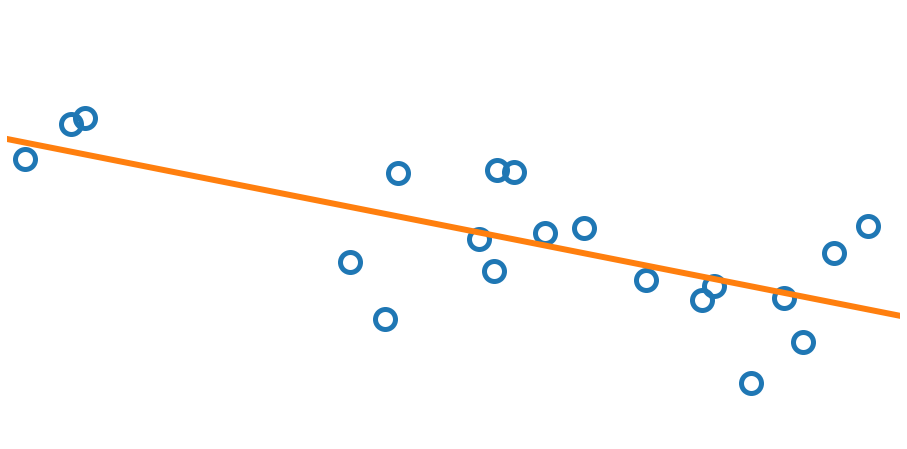

In [42]:
fig, ax = plt.subplots(figsize=figsize)

ax.plot(x, y, 'o', markerfacecolor='none', markeredgewidth=5, markersize=20)
ax.plot(test_x, test_y, linewidth=6);
ax.set_ylim(-0.5, 1.5)
ax.set_xlim(0, 1);
[v.set_visible(False) for v in ax.spines.values()]
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)

plt.savefig(join(IMG_DIR, 'linear_bayes1.png'), transparent=True)    


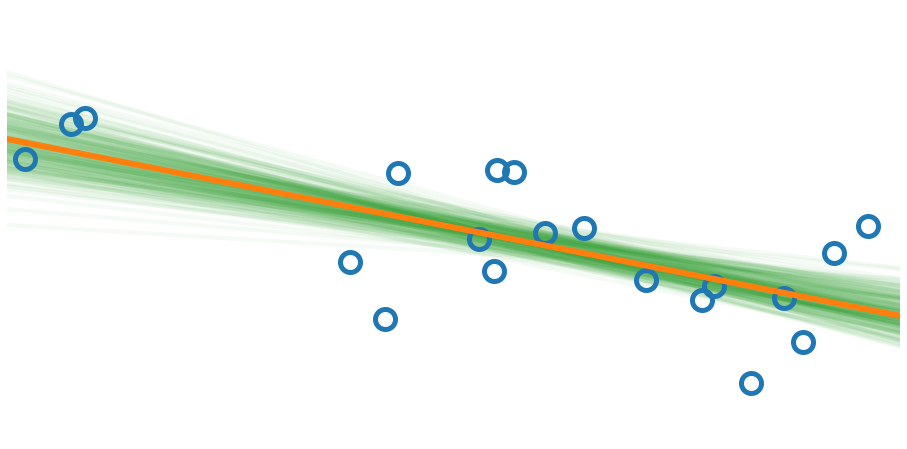

In [43]:
fig, ax = plt.subplots(figsize=figsize)


for row in np.linspace(0, trace['slope'].size - 1, num=200, dtype=int):
    ax.plot(test_x, trace['slope'][row] * test_x + trace['intercept'][row], '-', color='C2', alpha=0.05, linewidth=4);
ax.plot(x, y, 'o', markerfacecolor='none', markeredgewidth=5, markersize=20)
ax.plot(test_x, test_y, linewidth=6);
ax.set_ylim(-0.5, 1.5)
ax.set_xlim(0, 1)

[v.set_visible(False) for v in ax.spines.values()]
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)

plt.savefig(join(IMG_DIR, 'linear_bayes2.png'), transparent=True)    


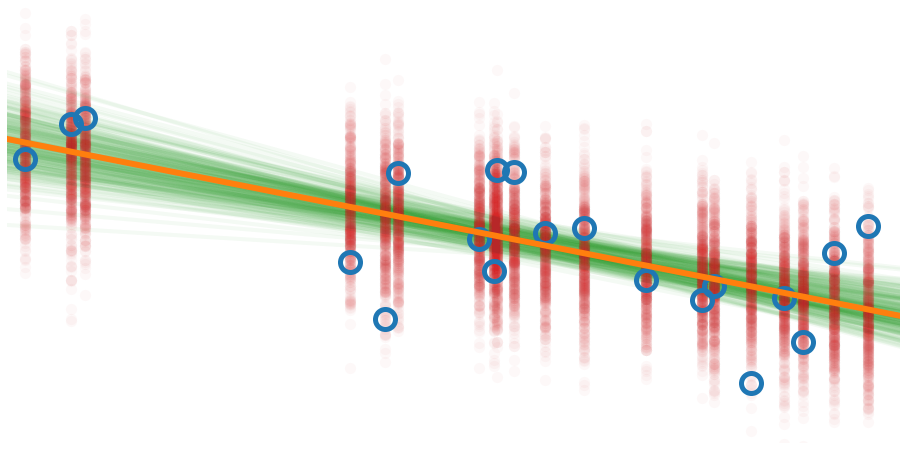

In [44]:
fig, ax = plt.subplots(figsize=figsize)

for row in np.linspace(0, trace['slope'].size - 1, num=200, dtype=int):
    ax.plot(test_x, trace['slope'][row] * test_x + trace['intercept'][row], '-', color='C2', alpha=0.05, linewidth=4);

ax.plot(x, posterior_predictive['y'].T, 'o', color='C3', alpha=0.03);
ax.plot(x, y, 'o', markerfacecolor='none', markeredgewidth=5, markersize=20)
ax.plot(test_x, test_y, linewidth=6)
ax.set_ylim(-0.5, 1.5)
ax.set_xlim(0, 1)

[v.set_visible(False) for v in ax.spines.values()]
ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)

plt.savefig(join(IMG_DIR, 'linear_bayes3.png'), transparent=True)    


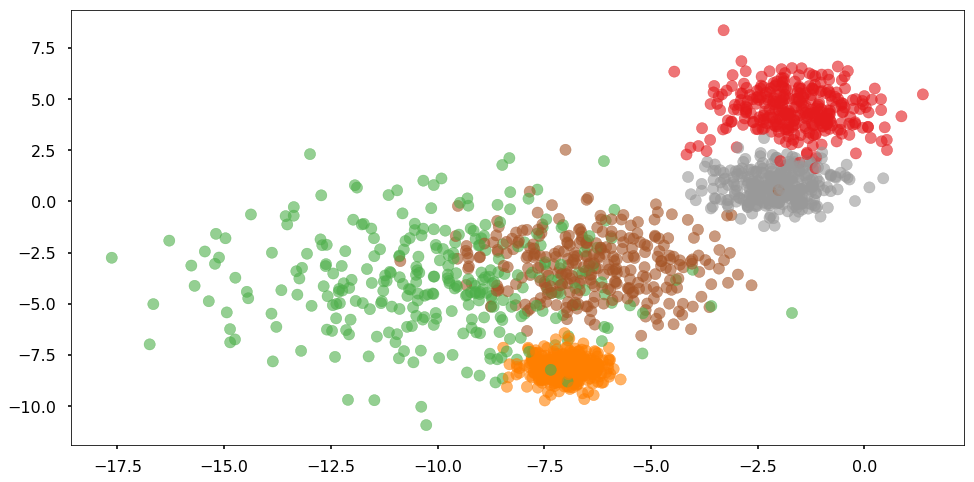

In [45]:
from sklearn.datasets import make_blobs

np.random.seed(1)


fig, ax = plt.subplots(figsize=figsize)

n_samples = 1500
cluster_std = [1.0, 2.5, 0.5, 1.5, .8]
X, y = make_blobs(n_samples=n_samples, 
                  cluster_std=cluster_std,
                  centers=len(cluster_std))

ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, alpha=.6);
plt.savefig(join(IMG_DIR, 'mixture1.png'), transparent=True)    


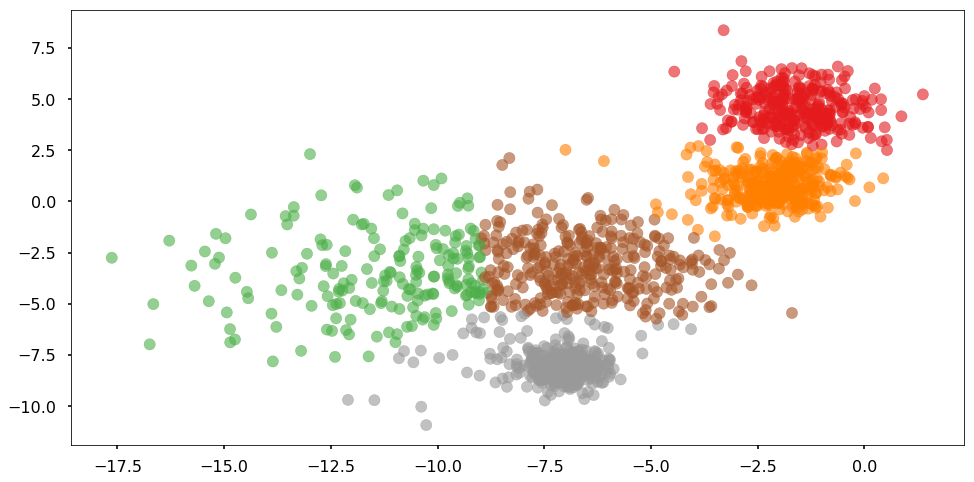

In [46]:
from sklearn.cluster import KMeans

fig, ax = plt.subplots(figsize=figsize)

nk = 5
# Incorrect number of clusters
y1 = KMeans(n_clusters=5, 
                n_init=50, 
                ).fit_predict(X)

ax.scatter(X[:, 0], X[:, 1], c=y1, cmap=plt.cm.Set1, alpha=.6);
plt.savefig(join(IMG_DIR, 'mixture2.png'), transparent=True)    


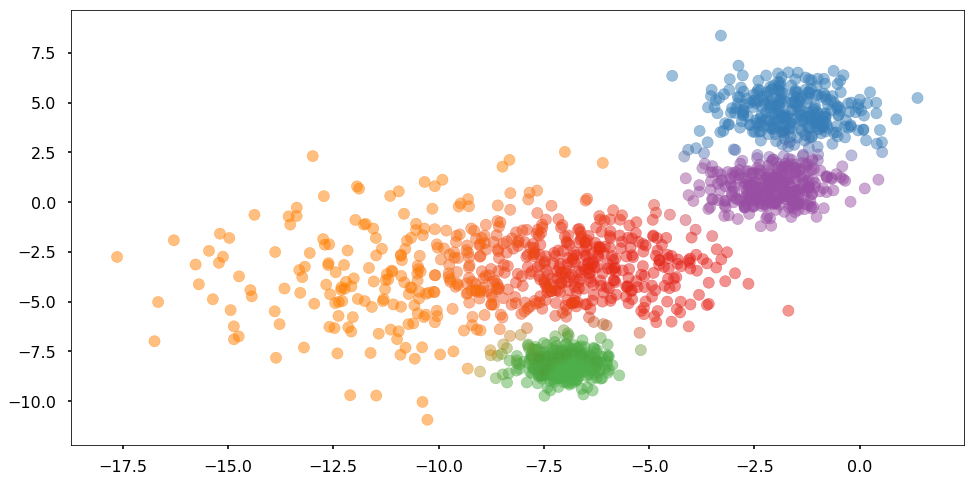

In [47]:
from sklearn.mixture import BayesianGaussianMixture as BayesGMM
K = 5
# Fit a Dirichlet process Gaussian mixture using five components
dpgmm = BayesGMM(n_components=K,
                 n_init=50,
                 covariance_type='full').fit(X)

fig, ax = plt.subplots(figsize=figsize)
probs = dpgmm.predict_proba(X)
colors = plt.cm.Set1(np.arange(probs.shape[1]))
for idx, col in enumerate(colors):
    c = np.vstack([col for _ in range(probs.shape[0])])
    c[:, -1] = 0.5 * probs[:, idx] / probs.sum(axis=1)
    ax.scatter(X[:, 0], X[:, 1], c=c);
    
plt.savefig(join(IMG_DIR, 'mixture3.png'), transparent=True)    


In [48]:
from arviz.tests import helpers

ModuleNotFoundError: No module named 'attr'

In [49]:
models = helpers.load_cached_models(500, 2)

NameError: name 'helpers' is not defined

In [41]:
len(dir(models['pymc3'][0]))

96

In [42]:
len(dir(models['pystan'][0]))

46

In [43]:
len(dir(models['pyro']))

42

In [44]:
len(dir(models['emcee']))

59

In [45]:
dir(models['pyro'])

['__abstractmethods__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_categorical',
 '_init',
 '_traces',
 'exec_traces',
 'kernel',
 'log_weights',
 'logger',
 'num_samples',
 'run',
 'warmup_steps']

In [46]:
dir(models['pymc3'][0])

['Var',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__latex__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_old_theano_config',
 '_parent',
 '_repr_latex_',
 '_theano_config',
 'add_random_variable',
 'basic_RVs',
 'bijection',
 'check_test_point',
 'cont_vars',
 'contexts',
 'd2logp',
 'd2logp_nojac',
 'datalogpt',
 'deterministics',
 'dict_to_array',
 'disc_vars',
 'dlogp',
 'dlogp_array',
 'dlogp_nojac',
 'fastd2logp',
 'fastd2logp_nojac',
 'fastdlogp',
 'fastdlogp_nojac',
 'fastfn',
 'fastlogp',
 'fastlogp_nojac',
 'flatten',
 'fn',
 'free_RVs',
 'get_context',
 'get_contexts',
 'isroot',
 'logp',
 'logp_array',
 'logp_dlogp

In [47]:
from graphviz import Digraph

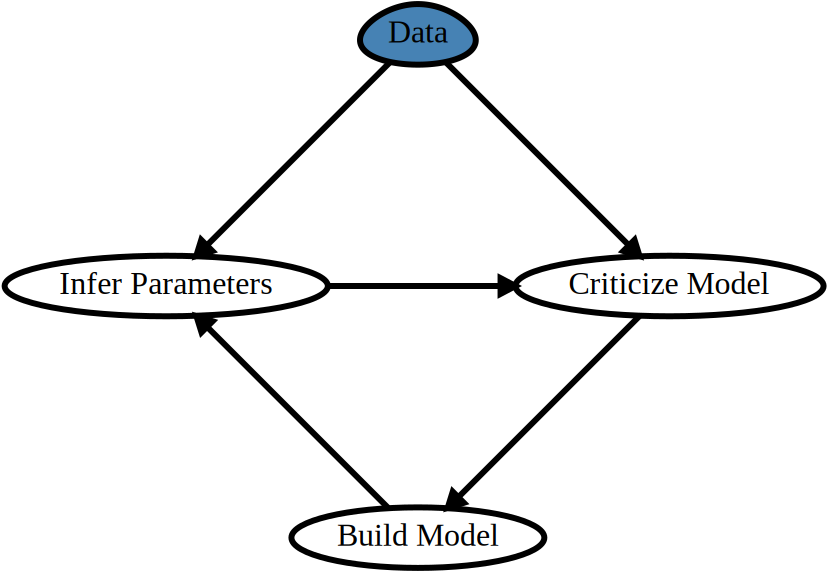

In [48]:
node_kwargs = {'fontsize': '32', 'penwidth': '6'}
edge_kwargs = {'penwidth': '6', 'arrowsize': '1.5'}
g = Digraph(engine='circo', format='png')

g.node('Build Model', **node_kwargs)
g.node('Infer Parameters', **node_kwargs)
g.node('Criticize Model', **node_kwargs)
# g.node('Use Model', **node_kwargs)
g.node('Data', shape='egg', fillcolor='steelblue', style='filled', **node_kwargs)
g.edge('Build Model', 'Infer Parameters', **edge_kwargs)
g.edge('Infer Parameters', 'Criticize Model', **edge_kwargs)
g.edge('Criticize Model', 'Build Model', **edge_kwargs)
# g.edge('Infer Parameters', 'Use Model', **edge_kwargs)
g.edge('Data', 'Criticize Model', **edge_kwargs)
g.edge('Data', 'Infer Parameters', **edge_kwargs)
g.render(join(IMG_DIR, 'box1'), cleanup=True)

g

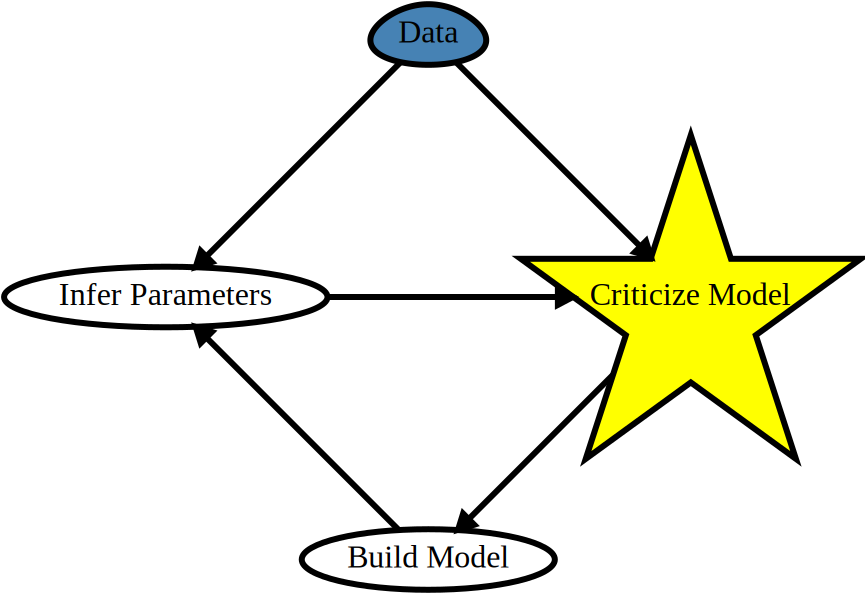

In [49]:
node_kwargs = {'fontsize': '32', 'penwidth': '6'}
edge_kwargs = {'penwidth': '6', 'arrowsize': '1.5'}
g = Digraph(engine='circo', format='png')

g.node('Build Model', **node_kwargs)
g.node('Infer Parameters', **node_kwargs)
g.node('Criticize Model', margin='0', **node_kwargs, shape='star', fixedsize='true', width='4.5', height='4.5', fillcolor='yellow', style='filled')
# g.node('Use Model', **node_kwargs)
g.node('Data', shape='egg', fillcolor='steelblue', style='filled', **node_kwargs)
g.edge('Build Model', 'Infer Parameters', **edge_kwargs)
g.edge('Infer Parameters', 'Criticize Model', **edge_kwargs)
g.edge('Criticize Model', 'Build Model', **edge_kwargs)
# g.edge('Infer Parameters', 'Use Model', **edge_kwargs)
g.edge('Data', 'Criticize Model', **edge_kwargs)
g.edge('Data', 'Infer Parameters', **edge_kwargs)
g.render(join(IMG_DIR, 'box2'), cleanup=True)
g

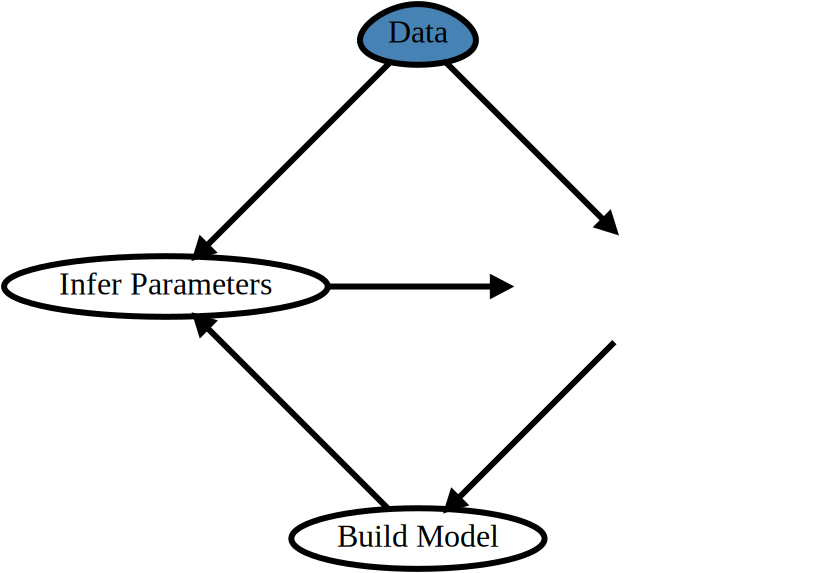

In [50]:
node_kwargs = {'fontsize': '32', 'penwidth': '6'}
edge_kwargs = {'penwidth': '6', 'arrowsize': '1.5'}
g = Digraph(engine='circo', format='png')

g.node('Build Model', **node_kwargs)
g.node('Infer Parameters', **node_kwargs)
g.node('Criticize Model', label='', image=join(IMG_DIR, 'arviz.png'), fixedsize='true', width='4.5', height='1.64', penwidth='0')
# g.node('Use Model', **node_kwargs)
g.node('Data', shape='egg', fillcolor='steelblue', style='filled', **node_kwargs)
g.edge('Build Model', 'Infer Parameters', **edge_kwargs)
g.edge('Infer Parameters', 'Criticize Model', **edge_kwargs)
g.edge('Criticize Model', 'Build Model', **edge_kwargs)
# g.edge('Infer Parameters', 'Use Model', **edge_kwargs)
g.edge('Data', 'Criticize Model', **edge_kwargs)
g.edge('Data', 'Infer Parameters', **edge_kwargs)
g.render(join(IMG_DIR, 'box3'), cleanup=True)
g